## Show impact factors

Training/Test Ratio: 3


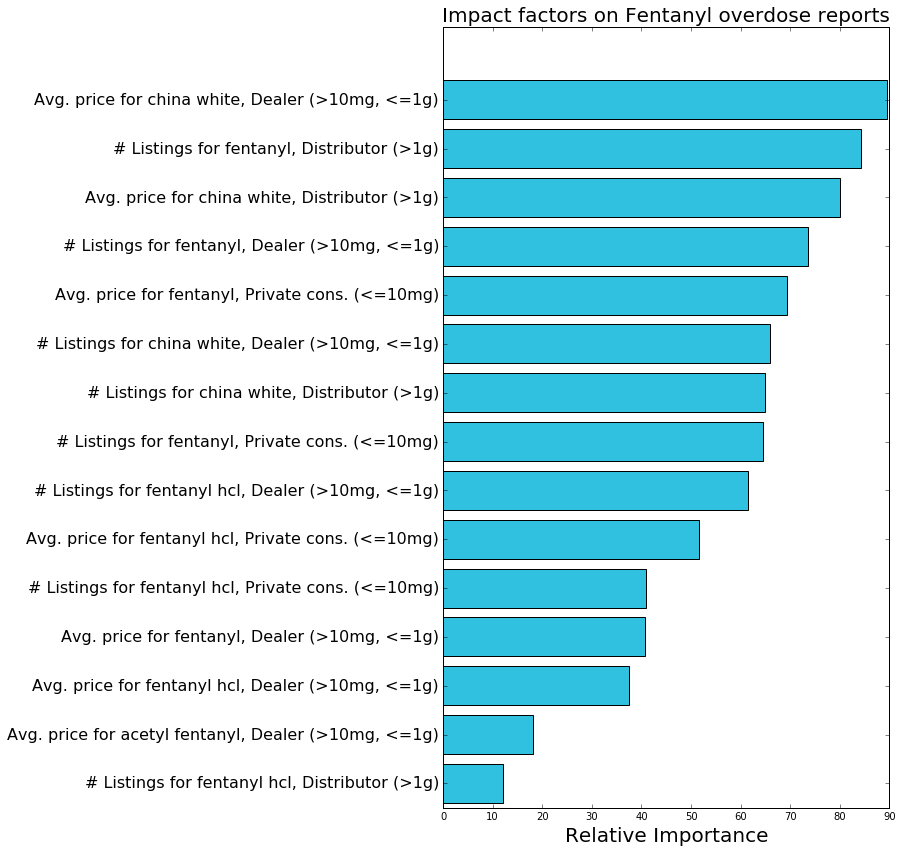

In [11]:
def showImpactFactors(featureModifier = []):
    import pandas as pd
    import numpy as np
    import pylab as plt
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import GaussianNB
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import cross_validation
    from sklearn.cross_validation import train_test_split
    import io
    %matplotlib inline


    X = np.load('./app/model/Fentanyl_Feature_X.npy')
    y = np.load('./app/model/Fentanyl_Output_y.npy')
    yLinear = np.load('./app/model/Fentanyl_Output_yLinear.npy')
    Xlabel = np.load('./app/model/Fentanyl_Xlabel.npy')

    # separate train/test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=1)

    # Create Random Forest object
    model= RandomForestClassifier(n_estimators=200)
    # Train the model using the training sets and check score
    model.fit(X_train,y_train)
    # Predict Output
    y_predicted = model.predict(X_test)

    print('Training/Test Ratio: {}'.format(X_train.shape[0] / X_test.shape[0]))
    pd.crosstab(y_test, y_predicted, rownames=['actual'], colnames=['preds'])

    # Get Feature Importance from the classifier
    numBars = 15
    feature_importance = model.feature_importances_
    # Normalize The Features
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    fig = plt.figure(figsize=(8, 14))
    plt.barh(pos[len(pos)-numBars-1:-1], feature_importance[sorted_idx][len(pos)-numBars-1:-1], align='center', color='#30C0E0')
    plt.yticks(pos[len(pos)-numBars-1:-1], np.asanyarray(Xlabel)[sorted_idx][len(pos)-numBars-1:-1],fontsize = 16)
    plt.xlabel('Relative Importance',fontsize = 20)
    plt.title('Impact factors on Fentanyl overdose reports',fontsize = 20)
    plt.show()
    img = io.BytesIO()
    fig.savefig(img,bbox_inches='tight')
    img.seek(0)
    return img
    
if __name__ == '__main__':
    featureModifier = 0
    showImpactFactors(featureModifier)


# Listings for fentanyl, Distributor (>1g)
Avg. price for china white, Dealer (>10mg, <=1g)
Avg. price for china white, Distributor (>1g)
1


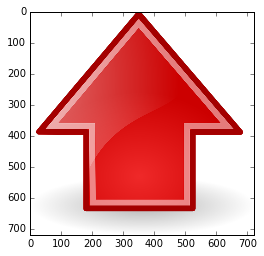

In [15]:
def betterPlace(featureModifier):
    from datetime import datetime
    import pandas as pd
    import numpy as np
    import pylab as plt
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import GaussianNB
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import cross_validation
    import io
    %matplotlib inline


    X = np.load('./app/model/Fentanyl_Feature_X.npy')
    y = np.load('./app/model/Fentanyl_Output_y.npy')
    yLinear = np.load('./app/model/Fentanyl_Output_yLinear.npy')
    Xlabel = np.load('./app/model/Fentanyl_Xlabel.npy')
    dateVector = np.load('./app/model/Fentanyl_dateVector.npy')
    dateVector = dateVector.astype(datetime)

#     # separate train/test data
#     np.random.seed(123)
#     is_trainData = np.random.uniform(0, 1, len(y)) <= .75
#     X_train, X_test = X[is_trainData==True], X[is_trainData==False]
#     y_train, y_test = y[is_trainData==True], y[is_trainData==False]
    
    from sklearn.cross_validation import train_test_split
    # separate train/test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=1)

    # Create Random Forest object
    model= RandomForestClassifier(n_estimators=10)
    # Train the model using the training sets and check score
    model.fit(X_train,y_train)
    # Predict Output

    print Xlabel[5]
    print Xlabel[28]
    print Xlabel[30]

    XX = X
    XX[:,5] *= featureModifier
    XX[:,28] *= featureModifier
    XX[:,30] *= featureModifier
    y_predicted = model.predict(X)
    y_predictedScaled = model.predict(XX)
#     print dateVector[350]
#     print y_predicted[350]

    from scipy import misc
    arrowUp = misc.imread('./app/static/images/arrowUp.png')
    arrowFlat = misc.imread('./app/static/images/arrowFlat.png')
    arrowDown = misc.imread('./app/static/images/arrowDown.png')
    
    import matplotlib.pyplot as plt
    print y_predictedScaled[350]

    if y_predictedScaled[350]==1:
        img = arrowUp
    if y_predictedScaled[350]==0:
        img = arrowFlat
    if y_predictedScaled[350]==-1:
        img = arrowDown

    with open("./app/static/images/arrowUp.png", "rb") as imageFile:
        f = imageFile.read()
        b = bytearray(f)
        
    fig = plt.imshow(img)
    plt.show()
#     img = io.BytesIO()
#     fig.savefig(img,bbox_inches='tight')
#     img.seek(0)
    return b


if __name__ == '__main__':
    featureModifier = 0.01
    outcome = betterPlace(featureModifier)



Log-loss of
 * uncalibrated classifier trained on 320 datapoints: 0.354 
 * classifier trained on 108 datapoints and calibrated on 432 datapoint: 0.646


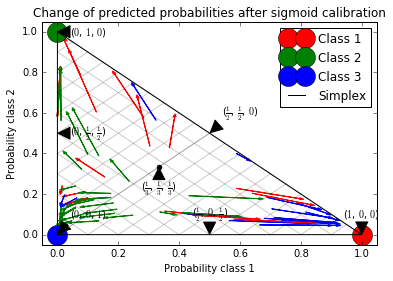

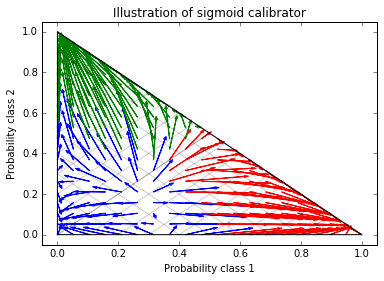

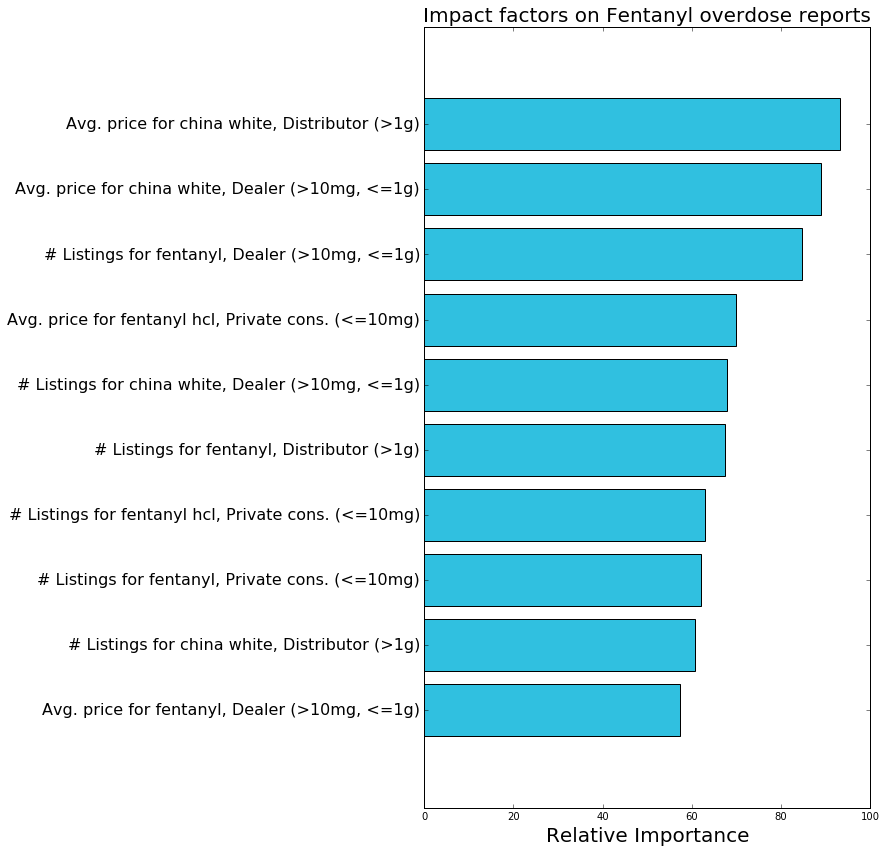

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from sklearn.cross_validation import train_test_split
%matplotlib inline

X = np.load('./app/model/Fentanyl_Feature_X.npy')
y = np.load('./app/model/Fentanyl_Output_y.npy')

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=123)

## Fix class imbalance
from unbalanced_dataset.over_sampling import RandomOverSampler
from unbalanced_dataset.over_sampling import SMOTE #Synthetic Minority Over-sampling Technique
# 'SMOTE'
smote = SMOTE(ratio='auto', verbose=False, kind='regular')
SMO_X_temp, SMO_y_temp = smote.fit_transform(X_train_valid, y_train_valid)
SMO_X_train_valid, SMO_y_train_valid = smote.fit_transform(SMO_X_temp, SMO_y_temp)

# separate validation/test data
split = int(len(SMO_X_train_valid)*0.2)
X_train = SMO_X_train_valid[:split]
X_valid = SMO_X_train_valid[split:]
y_train = SMO_y_train_valid[:split]
y_valid = SMO_y_train_valid[split:]

# Train uncalibrated random forest classifier on whole train and validation data and evaluate on test data
clf = RandomForestClassifier(n_estimators=250)
clf.fit(X_train_valid, y_train_valid)
clf_probs = clf.predict_proba(X_test)
score = log_loss(y_test, clf_probs)

# Train random forest classifier, calibrate on validation data and evaluate on test data
clf = RandomForestClassifier(n_estimators=250)
clf.fit(X_train, y_train)
clf_probs = clf.predict_proba(X_test)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", cv="prefit")
sig_clf.fit(X_valid, y_valid)
sig_clf_probs = sig_clf.predict_proba(X_test)
sig_score = log_loss(y_test, sig_clf_probs)

# Plot changes in predicted probabilities via arrows
plt.figure(0)
colors = ["r", "g", "b"]
for i in range(clf_probs.shape[0]):
    plt.arrow(clf_probs[i, 0], clf_probs[i, 1],
              sig_clf_probs[i, 0] - clf_probs[i, 0],
              sig_clf_probs[i, 1] - clf_probs[i, 1],
              color=colors[y_test[i]], head_width=1e-2)

# Plot perfect predictions
plt.plot([1.0], [0.0], 'ro', ms=20, label="Class 1")
plt.plot([0.0], [1.0], 'go', ms=20, label="Class 2")
plt.plot([0.0], [0.0], 'bo', ms=20, label="Class 3")

# Plot boundaries of unit simplex
plt.plot([0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], 'k', label="Simplex")

# Annotate points on the simplex
plt.annotate(r'($\frac{1}{3}$, $\frac{1}{3}$, $\frac{1}{3}$)',
             xy=(1.0/3, 1.0/3), xytext=(1.0/3, .23), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.plot([1.0/3], [1.0/3], 'ko', ms=5)
plt.annotate(r'($\frac{1}{2}$, $0$, $\frac{1}{2}$)',
             xy=(.5, .0), xytext=(.5, .1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($0$, $\frac{1}{2}$, $\frac{1}{2}$)',
             xy=(.0, .5), xytext=(.1, .5), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($\frac{1}{2}$, $\frac{1}{2}$, $0$)',
             xy=(.5, .5), xytext=(.6, .6), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($0$, $0$, $1$)',
             xy=(0, 0), xytext=(.1, .1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($1$, $0$, $0$)',
             xy=(1, 0), xytext=(1, .1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($0$, $1$, $0$)',
             xy=(0, 1), xytext=(.1, 1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
# Add grid
plt.grid("off")
for x in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    plt.plot([0, x], [x, 0], 'k', alpha=0.2)
    plt.plot([0, 0 + (1-x)/2], [x, x + (1-x)/2], 'k', alpha=0.2)
    plt.plot([x, x + (1-x)/2], [0, 0 + (1-x)/2], 'k', alpha=0.2)

plt.title("Change of predicted probabilities after sigmoid calibration")
plt.xlabel("Probability class 1")
plt.ylabel("Probability class 2")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.legend(loc="best")

print "Log-loss of"
print " * uncalibrated classifier trained on %d datapoints: %.3f "\
    %(len(X_train_valid), score)
print " * classifier trained on %d datapoints and calibrated on %d datapoint: %.3f"\
    %(len(X_train),len(X_valid),sig_score)
    
# Illustrate calibrator
plt.figure(1)
# generate grid over 2-simplex
p1d = np.linspace(0, 1, 20)
p0, p1 = np.meshgrid(p1d, p1d)
p2 = 1 - p0 - p1
p = np.c_[p0.ravel(), p1.ravel(), p2.ravel()]
p = p[p[:, 2] >= 0]

calibrated_classifier = sig_clf.calibrated_classifiers_[0]
prediction = np.vstack([calibrator.predict(this_p)
                        for calibrator, this_p in
                        zip(calibrated_classifier.calibrators_, p.T)]).T
prediction /= prediction.sum(axis=1)[:, None]

# Ploit modifications of calibrator
for i in range(prediction.shape[0]):
    plt.arrow(p[i, 0], p[i, 1],
              prediction[i, 0] - p[i, 0], prediction[i, 1] - p[i, 1],
              head_width=1e-2, color=colors[np.argmax(p[i])])
# Plot boundaries of unit simplex
plt.plot([0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], 'k', label="Simplex")

plt.grid("off")
for x in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    plt.plot([0, x], [x, 0], 'k', alpha=0.2)
    plt.plot([0, 0 + (1-x)/2], [x, x + (1-x)/2], 'k', alpha=0.2)
    plt.plot([x, x + (1-x)/2], [0, 0 + (1-x)/2], 'k', alpha=0.2)

plt.title("Illustration of sigmoid calibrator")
plt.xlabel("Probability class 1")
plt.ylabel("Probability class 2")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.show()

# Get Feature Importance from the classifier
numBars = 10
feature_importance = clf.feature_importances_
# Normalize The Features
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 14))
plt.barh(pos[len(pos)-numBars-1:-1], feature_importance[sorted_idx][len(pos)-numBars-1:-1], align='center', color='#30C0E0')
plt.yticks(pos[len(pos)-numBars-1:-1], np.asanyarray(Xlabel)[sorted_idx][len(pos)-numBars-1:-1],fontsize = 16)
plt.xlabel('Relative Importance',fontsize = 20)
plt.title('Impact factors on Fentanyl overdose reports',fontsize = 20)
plt.show()


Feature ranking:
1. feature 0 (0.088265)
2. feature 3 (0.074824)
3. feature 1 (0.054748)
4. feature 2 (0.050586)


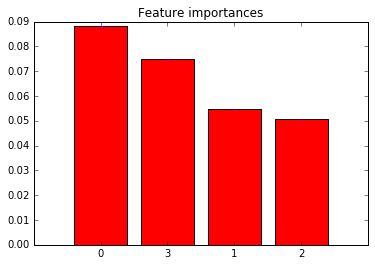

In [127]:

importances = clf.feature_importances_[0:4]
std = np.std([clf.feature_importances_[0:4] for tree in clf.estimators_[0:4]],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(importances.shape[0]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(importances.shape[0]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(importances.shape[0]), indices)
plt.xlim([-1, importances.shape[0]])
plt.show()

In [12]:
# Pickle the model with SMOTE and calibration

# np.save('Fentanyl_Feature_X', X)
# np.save('Fentanyl_Output_y', y)
# np.save('Fentanyl_Output_yDiff', yDiff)
# np.save('Fentanyl_Output_yLinear', yLinear)
# np.save('Fentanyl_Xlabel', Xlabel)
# np.save('Fentanyl_dateVector', dateVector)

import pickle
with open('DNetModel_SMOTE_calib.b', 'wb') as modelfile:
    pickle.dump(sig_clf, modelfile)

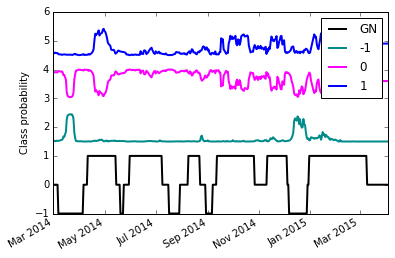

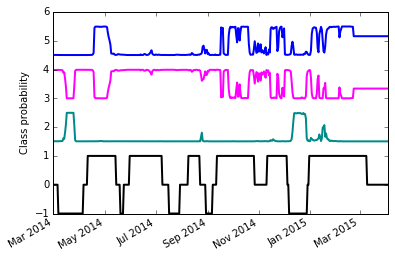

In [30]:
from datetime import datetime
import pandas as pd
import numpy as np
import pylab as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
import io
%matplotlib inline

X = np.load('./app/model/Fentanyl_Feature_X.npy')
y = np.load('./app/model/Fentanyl_Output_y.npy')
yLinear = np.load('./app/model/Fentanyl_Output_yLinear.npy')
Xlabel = np.load('./app/model/Fentanyl_Xlabel.npy')
dateVector = np.load('./app/model/Fentanyl_dateVector.npy')
dateVector = dateVector.astype(datetime)

clf_probs = clf.predict_proba(X)
sig_clf_probs = sig_clf.predict_proba(X)

# print clf_probs

linecolors = ['black','darkcyan','magenta','blue']
labelText = ['GN','-1','0','1']
fig, ax = plt.subplots(1)
ax.plot(dateVector, y, linewidth = 2, color=linecolors[0], label=labelText[0])
for ii in range(0,3):
    # plot time series
    ax.plot(dateVector, clf_probs[:,ii]+(ii+1)*1.5, linewidth = 2, color=linecolors[ii+1], label=labelText[ii+1])
    plt.ylabel('Class probability')
    fig.autofmt_xdate()
    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

linecolors = ['black','darkcyan','magenta','blue']
labelText = ['GN','-1','0','1']
fig, ax = plt.subplots(1)
ax.plot(dateVector, y, linewidth = 2, color=linecolors[0], label=labelText[0])
for ii in range(0,3):
    # plot time series
    ax.plot(dateVector, sig_clf_probs[:,ii]+(ii+1)*1.5, linewidth = 2, color=linecolors[ii+1], label=labelText[ii+1])
    plt.ylabel('Class probability')
    fig.autofmt_xdate()
    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, labels)
plt.show()


In [18]:
import numpy as np


dateVector = np.load('./app/model/Fentanyl_dateVector.npy')

print dateVector[365]



2015-02-28T19:00:00.000000-0500


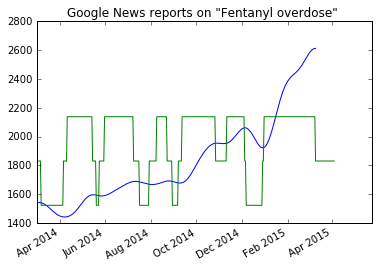

In [28]:
def plotGNTrend():
    import numpy as np
    import pylab as plt
    from datetime import datetime
    import matplotlib.dates as mdates
    %matplotlib inline

    yClassified = np.load('./app/model/Fentanyl_Output_y.npy')
    yLinear = np.load('./app/model/Fentanyl_Output_yLinear.npy')
    dateVector = np.load('./app/model/Fentanyl_dateVector.npy')
    dateVector = dateVector.astype(datetime)

    yC = yClassified*np.nanstd(yLinear)+np.nanmean(yLinear)
    
    plt.close('all')
#     fig, ax = plt.figure(figsize=(4, 3))
    fig, ax = plt.subplots(1)
    ax.plot(dateVector, yLinear)
    ax.plot(dateVector,yC)
    # rotate and align the tick labels so they look better
    fig.autofmt_xdate()
    # use a more precise date string for the x axis locations in the toolbar
    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
    plt.title("""Google News reports on "Fentanyl overdose" """)
    xLim = ax.get_xlim()
    ax.set_xlim(xLim[0], xLim[1]+50)
    
    
if __name__ == '__main__':
    plotGNTrend()

# Listings for fentanyl, Private cons. (<=10mg)
# Listings for fentanyl, Dealer (>10mg, <=1g)
# Listings for fentanyl, Distributor (>1g)
Avg. price for china white, Dealer (>10mg, <=1g)
Avg. price for china white, Distributor (>1g)
1.6 0.05
1.8 0.05
2.0 0.05
2.2 0.05
2.4 0.06
2.6 0.08
2.8 0.08
3.0 0.07
3.2 0.08
3.4 0.08
3.6 0.08
3.8 0.08
4.0 0.08
4.0 0.08
0.37


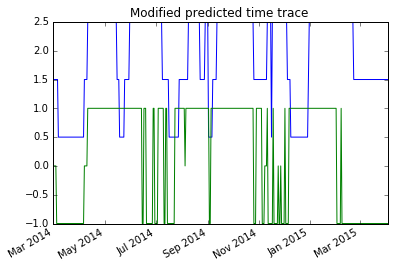

In [43]:
import cPickle
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
import pylab as plt
%matplotlib inline


X = np.load('./app/model/Fentanyl_Feature_X.npy')
y = np.load('./app/model/Fentanyl_Output_y.npy')
yLinear = np.load('./app/model/Fentanyl_Output_yLinear.npy')
Xlabel = np.load('./app/model/Fentanyl_Xlabel.npy')
dateVector = np.load('./app/model/Fentanyl_dateVector.npy')
dateVector = dateVector.astype(datetime)

with open(r"./app/model/DNetModel.b", "rb") as input_file:
    deployed_model = cPickle.load(input_file)


prob = deployed_model.predict_proba(X)
pDecreasing = np.mean(prob[:,0])
pStable = np.mean(prob[:,1])
pIncreasing = np.mean(prob[:,2])

prediction = deployed_model.predict(X)

print Xlabel[1]
print Xlabel[3]
print Xlabel[5]
print Xlabel[28]
print Xlabel[30]



# ---30,21,31,4,2---
# ---$,$,#,#,$---

dollarModRange = np.linspace(1,4,16)
numberModRange = np.linspace(0.5,0.05,46)
autoSelect = []
for dollarMod in dollarModRange:
    for numberMod in numberModRange:

        XX = np.copy(X)
        # Fentanyl HCl price
        XX[:,0] *= dollarMod
        XX[:,2] *= dollarMod
        XX[:,4] *= dollarMod
        XX[:,18] *= dollarMod
        XX[:,20] *= dollarMod
        XX[:,22] *= dollarMod
        # China White price
        XX[:,28] *= dollarMod
        XX[:,30] *= dollarMod
        # Fentanyl number of listings
        XX[:,1] *= numberMod
        XX[:,3] *= numberMod
        XX[:,5] *= numberMod
        XX[:,19] *= numberMod
        XX[:,21] *= numberMod
        XX[:,23] *= numberMod
        # China White number of listings
        XX[:,29] *= numberMod
        XX[:,31] *= numberMod

        # probability for 1 year after data start
        probMod = deployed_model.predict_proba(XX)
        pDecreasingMod = np.mean(probMod[355:375,0])
        pStableMod = np.mean(probMod[355:375,1])
        pIncreasingMod = np.mean(probMod[355:375,2])

        if pIncreasingMod < pDecreasingMod:
            print dollarMod, numberMod
            autoSelect.append([dollarMod,numberMod])
            break
        
print dollarMod, numberMod
print pDecreasingMod



# # p = np.mean(prediction)
# print pDecreasingMod
# print pStableMod
# print pIncreasingMod
# print y
# print prediction

# predict for a time of strong OD increase    
predictionMod = deployed_model.predict(XX)


fig, ax = plt.subplots(1)
ax.plot(dateVector,prediction+1.5)
ax.plot(dateVector,predictionMod)
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
# use a more precise date string for the x axis locations in the toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.title("""Modified predicted time trace """)

np.save('AutoSelect', autoSelect)


In [42]:

print autoSelect[0][1]
# 2.0 0.05
# 2.2 0.05
# 2.4 0.06
# 2.6 0.08
# 2.8 0.08
# 3.0 0.07
# 3.2 0.08
# 3.4 0.08
# 3.6 0.08
# 3.8 0.08
# 4.0 0.08
# 4.0 0.08





0.05


In [2]:
def findTurnaroundParams():
    import cPickle
    import numpy as np
    from random import randint
    
    XX = np.load('./app/model/Fentanyl_Feature_X.npy')
    autoSel = np.load('./app/model/AutoSelect.npy')

    with open(r"./app/model/DNetModel.b", "rb") as input_file:
        deployed_model = cPickle.load(input_file)


    idx = randint(0,len(autoSel)-1)
    dollarMod = autoSel[idx][0]
    numberMod = autoSel[idx][1]

    # Fentanyl HCl price
    XX[:,0] *= dollarMod
    XX[:,2] *= dollarMod
    XX[:,4] *= dollarMod
    XX[:,18] *= dollarMod
    XX[:,20] *= dollarMod
    XX[:,22] *= dollarMod
    # China White price
    XX[:,28] *= dollarMod
    XX[:,30] *= dollarMod
    # Fentanyl number of listings
    XX[:,1] *= numberMod
    XX[:,3] *= numberMod
    XX[:,5] *= numberMod
    XX[:,19] *= numberMod
    XX[:,21] *= numberMod
    XX[:,23] *= numberMod
    # China White number of listings
    XX[:,29] *= numberMod
    XX[:,31] *= numberMod

    # probability for 1 year after data start
    probMod = deployed_model.predict_proba(XX)
    pDecreasing = np.mean(probMod[355:375,0])
    pStable = np.mean(probMod[355:375,1])
    pIncreasing = np.mean(probMod[355:375,2])
    
    return dollarMod, numberMod, pDecreasing

if __name__ == '__main__':
    dollarMod, numberMod, pDecreasing = findTurnaroundParams()
    print dollarMod, numberMod, pDecreasing

3.6 0.08 0.37425


In [10]:
def predictDecrease(dollarMod,numberMod):
    import cPickle
    import numpy as np
    from random import randint

    XX = np.load('./app/model/Fentanyl_Feature_X.npy')

    with open(r"./app/model/DNetModel.b", "rb") as input_file:
        deployed_model = cPickle.load(input_file)

    # Fentanyl HCl price
    XX[:,0] *= dollarMod
    XX[:,2] *= dollarMod
    XX[:,4] *= dollarMod
    XX[:,18] *= dollarMod
    XX[:,20] *= dollarMod
    XX[:,22] *= dollarMod
    # China White price
    XX[:,28] *= dollarMod
    XX[:,30] *= dollarMod
    # Fentanyl number of listings
    XX[:,1] *= numberMod
    XX[:,3] *= numberMod
    XX[:,5] *= numberMod
    XX[:,19] *= numberMod
    XX[:,21] *= numberMod
    XX[:,23] *= numberMod
    # China White number of listings
    XX[:,29] *= numberMod
    XX[:,31] *= numberMod

    # probability for 1 year after data start
    probMod = deployed_model.predict_proba(XX)
    pDecreasing = np.mean(probMod[355:375,0])
    pStable = np.mean(probMod[355:375,1])
    pIncreasing = np.mean(probMod[355:375,2])
    
    return pDecreasing

if __name__ == '__main__':
    dollarMod=1.8
    numberMod=0.1
    pDecreasing = predictDecrease(dollarMod,numberMod)
    print pDecreasing

0.26425
